<a href="https://colab.research.google.com/github/jeev-data-wiz/Sales_analysis/blob/main/ML_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

Load the datasets from the internet

In [ ]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

Scaling the values

In [ ]:
scale_factor = 1000.0
train_df["median_house_value"] /= scale_factor
test_df["median_house_value"] /= scale_factor

Build model / Train model functions

In [ ]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, my_epochs,
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the
  # rest of history.
  epochs = history.epoch

  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history

Plotting function

In [ ]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()

  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)

  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()

print("Defined the plot_the_loss_curve function.")

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:

from google.colab import files
uploaded = files.upload()


Saving New sales order list 2022.XLSX to New sales order list 2022.XLSX


In [3]:
from google.colab import files
uploaded = files.upload()

Saving new sales order list 2023 1.XLSX to new sales order list 2023 1.XLSX


In [4]:
df23=pd.read_excel('/content/new sales order list 2023 1.XLSX')
df22=pd.read_excel('/content/New sales order list 2022.XLSX')

# First Analysis will be done on the 2022 dataset

In [5]:
df22.head()

,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695615,10,...,4.0,0.0,400.00,1600.00,AED,1.0,2023-02-01,EL01,EL01,EL01
1,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695613,10,...,2.0,0.0,910.00,1820.00,AED,1.0,2023-01-05,SCE,SW,SW
2,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695611,10,...,1.0,0.0,329.99,329.99,AED,1.0,2022-12-31,SCE,SW,SW
3,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695610,10,...,2.0,0.0,98.80,197.60,AED,1.0,2023-01-04,EL01,EL01,EL01
4,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695608,10,...,1.0,0.0,32.50,32.50,AED,1.0,2022-12-31,SU10,EL01,EL01


In [11]:
df22.columns.unique().value_counts

<bound method IndexOpsMixin.value_counts of Index(['Division', 'Division Name', 'Sales Organization',
       'Sales Organization Name', 'Distribution Channel',
       'Distribution Channel Name', 'Sales Document Type',
       'Sales Document Type.1', 'Sales Document', 'Sales Document Item',
       'Document Date', 'Sold-To Party', 'Sold-To Party Name', 'Material',
       'Item Type', 'Sched.line category', 'Sales Unit',
       'Order Quantity (Schedule Line)', 'Delivered Quantity SU',
       'Pending Quantity SU', 'Net Price', 'Net Value (Item)',
       'Document Currency', 'Exchange Rate', 'Delivery Date',
       'Storage Location', 'Shipping Point/Receiving Pt', 'Plant'],
      dtype='object')>

In [20]:
df22.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Net Value (Item)                  0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [16]:
df22['Sales']=df22['Net Value (Item)'].astype('float')*df22['Exchange Rate'].astype('float')

<ipython-input-17-bc7c8b88bdd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df22.corr(),annot=True)


<Axes: >

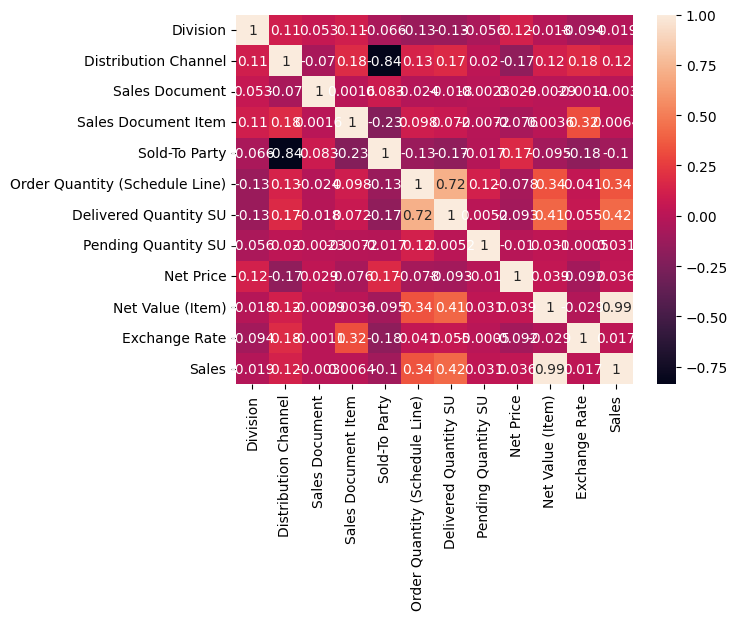

In [17]:
sns.heatmap(df22.corr(),annot=True)

In [24]:
df22['Document Date'] = pd.to_datetime(df22['Document Date'], format='%Y-%m-%d') # convert date column to datatime object

# Create Date-related Features to be used for EDA and Supervised ML: Regression
df22['year'] = df22['Document Date'].dt.year
df22['month'] = df22['Document Date'].dt.month
df22['day'] = df22['Document Date'].dt.day
df22['weekday'] = df22['Document Date'].dt.weekday
df22['weekday'] = np.where(df22.weekday == 0, 7, df22.weekday)

In [28]:
data22=df22[['Document Date','year','month','day','weekday','Sales']]
data22.head(5)

,Document Date,year,month,day,weekday,Sales
0,2022-12-31,2022,12,31,5,1600.00
1,2022-12-31,2022,12,31,5,1820.00
2,2022-12-31,2022,12,31,5,329.99
3,2022-12-31,2022,12,31,5,197.60
4,2022-12-31,2022,12,31,5,32.50


Exploring Data

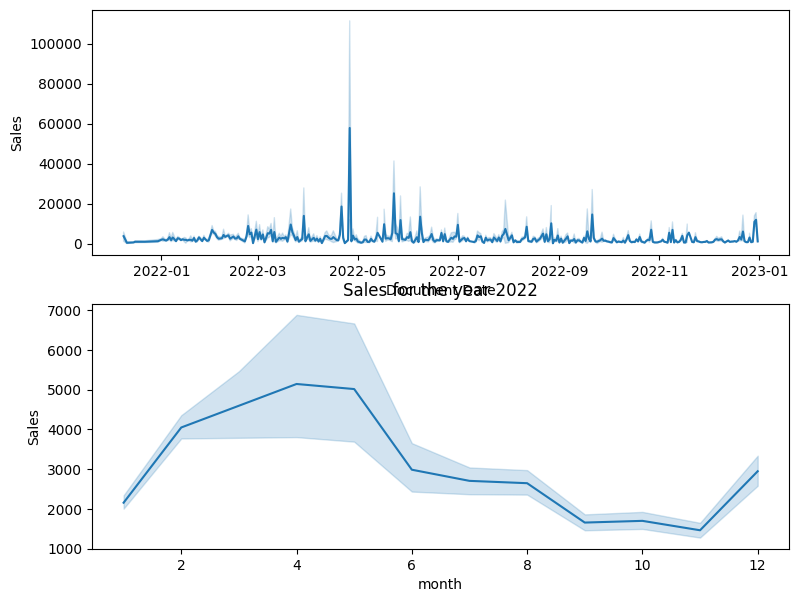

In [35]:
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
plot = sns.lineplot(x='Document Date', y='Sales', data=data22,ax=axs[0])
plot = sns.lineplot(x='month', y='Sales', data=data22,ax=axs[1])
_ = plot.set(title='Sales for the year 2022')

In [36]:
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [39]:
data22.shape

(45075, 6)

In [40]:
0.7*45075

31552.499999999996

In [46]:
#round off to 31553
train_df_22=data22.loc[:31553]
test_df_22=data22.loc[31554:]
train_df_22.head()

,Document Date,year,month,day,weekday,Sales
0,2022-12-31,2022,12,31,5,1600.00
1,2022-12-31,2022,12,31,5,1820.00
2,2022-12-31,2022,12,31,5,329.99
3,2022-12-31,2022,12,31,5,197.60
4,2022-12-31,2022,12,31,5,32.50


In [43]:
pred_df_22=test_df_22.drop('Sales',axis=1)

In [ ]:
dates = (test_df_22['Document Date'] - np.timedelta64(1, 'Y') + \
        np.timedelta64(1, 'D')).values.astype('datetime64[D]')
seasonal_naive_sales = train_df_22[train_df_22['Document Date'].astype('datetime64[D]').isin(dates)]['Sales']


pred_df_22['seasonal_naive_sales'] = pd.DataFrame(seasonal_naive_sales).set_index(test_df_22.index)
pred_df_22.head()


In [ ]:
plt.figure(figsize=(14,7))
plt.plot(train_df_22['date'], train_df['sales'], label='Train')
plt.plot(test_df['date'], test_df['sales'], label='Test')
plt.plot(sn_pred_df['date'], sn_pred_df['seasonal_naive_sales'], label='Forecast - Seasonal Naive')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Forecasts using Baseline Model: Seasonal Naive')
plt.show()